In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

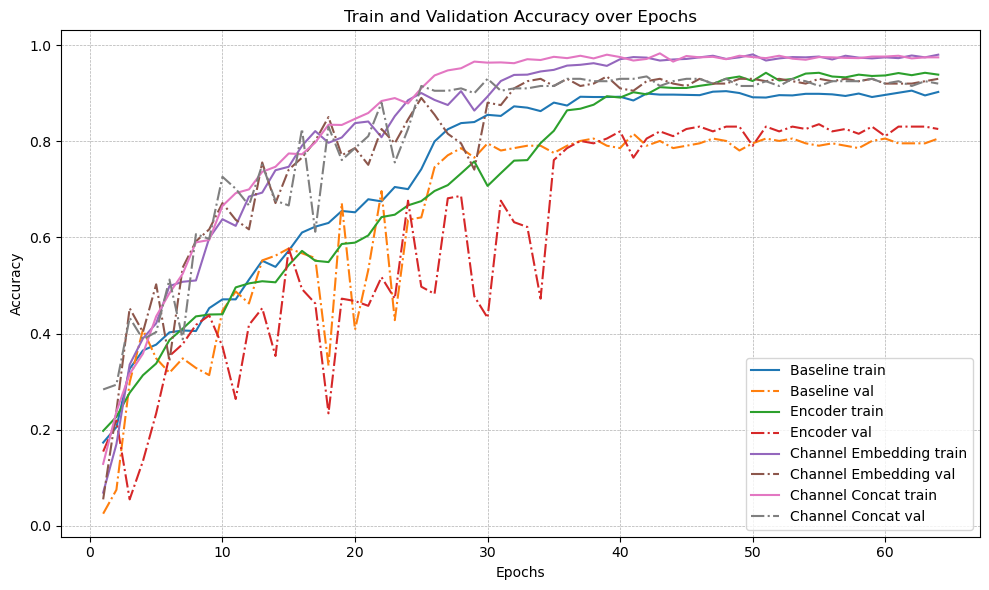

In [4]:
# Define file paths and corresponding labels
files = {
    '1_Baseline.csv': 'Baseline',
    '2_Encoder.csv': 'Encoder','3_Channel_Embedding.csv': 'Channel Embedding',
    '4_Channel_Concat.csv': 'Channel Concat'
}

# Plotting the data
plt.figure(figsize=(10, 6))

for file_path, label in files.items():
    # Read CSV file
    df = pd.read_csv(file_path)
    
    # Plot 'Epoch' vs 'Train Accuracy'
    plt.plot(df['Epoch'], df['Train Accuracy'], label=f'{label} train')
    plt.plot(df['Epoch'], df['Valid Accuracy'], linestyle='-.' ,label=f'{label} val')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Display the plot
# plt.figure(figsize=(7, 5))
plt.tight_layout()
plt.savefig('Train and Validation Accuracy over Epochs_202502121526.tiff',dpi=600, pil_kwargs={'compression': 'tiff_lzw'})
plt.show()


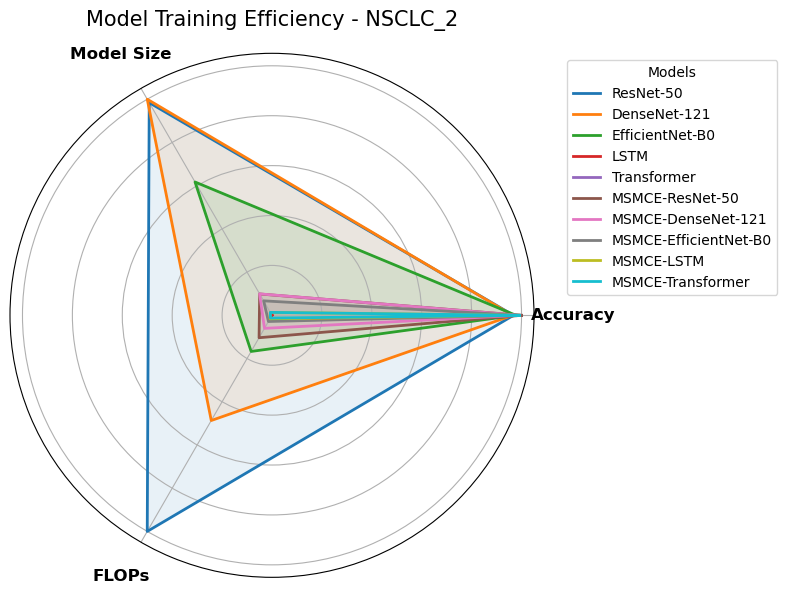

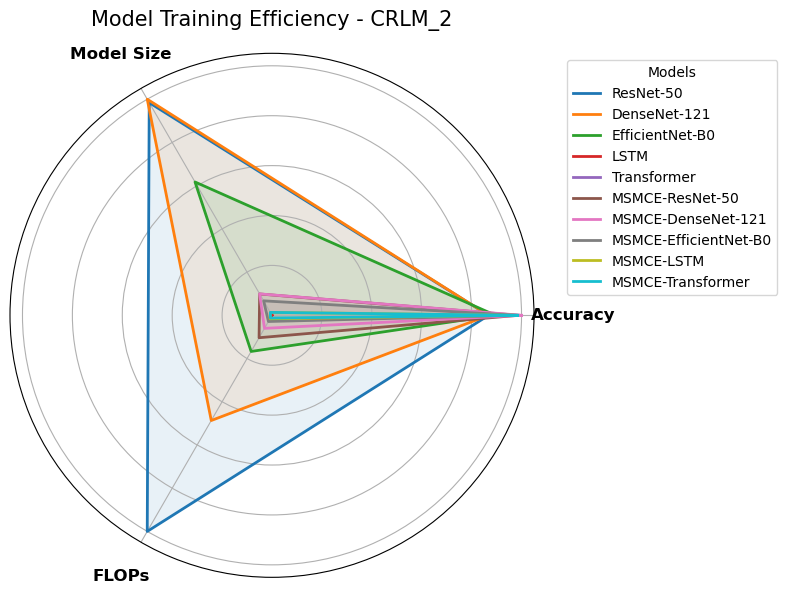

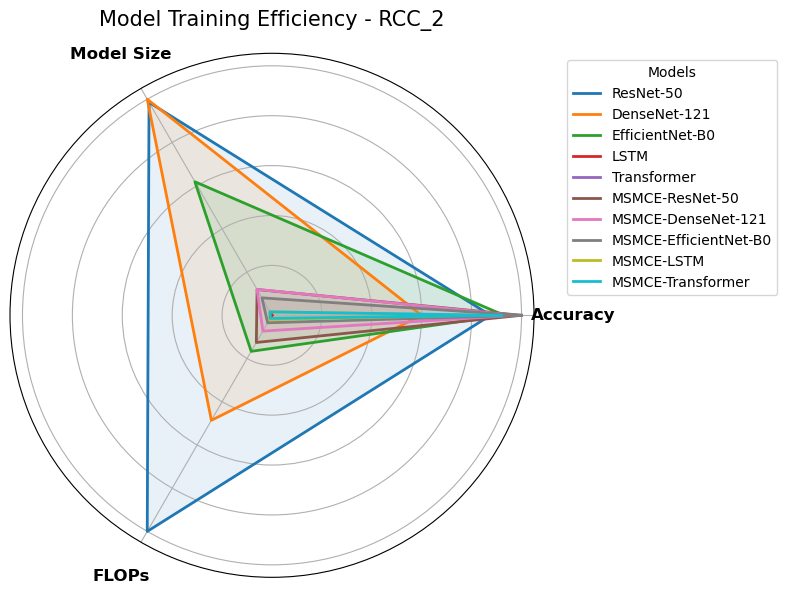

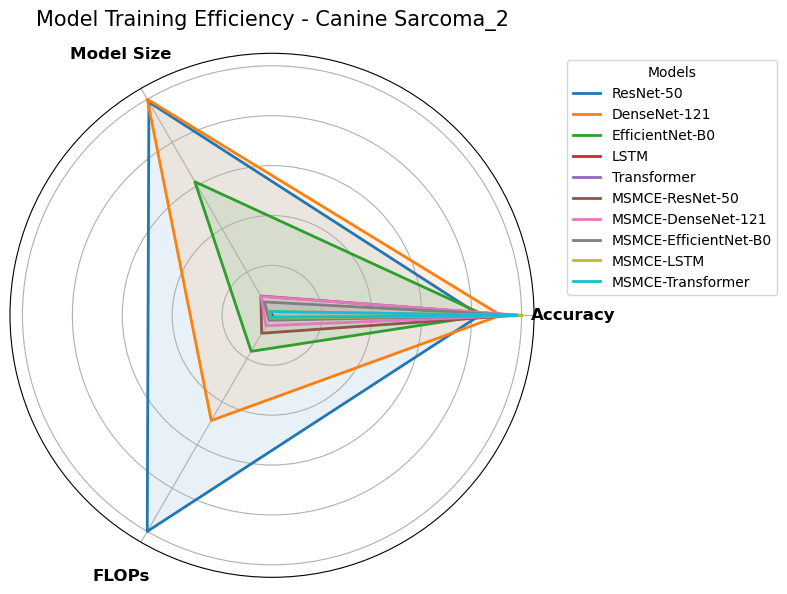

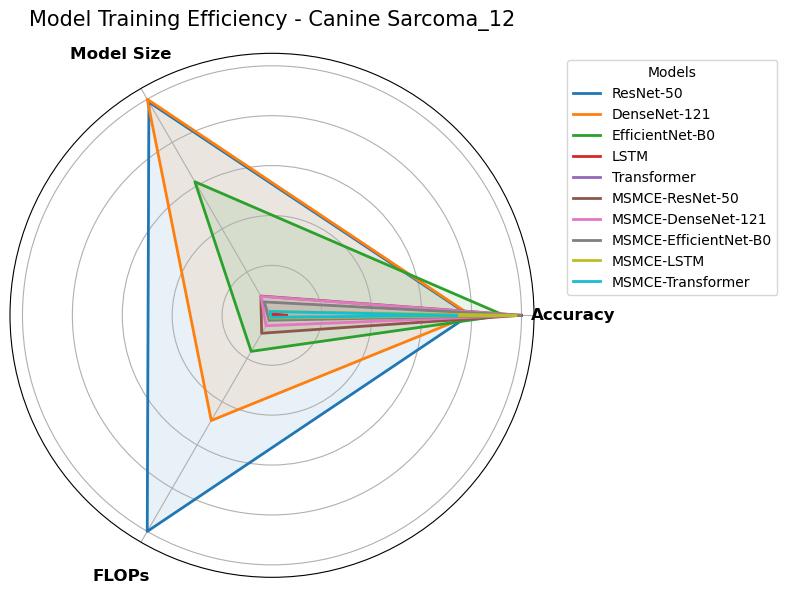

In [5]:
file_path = "MSMCE Model Size&FLOPs.xlsx"
xls = pd.ExcelFile(file_path)

columns_needed = ["Model", "Total Size (MB)", "FLOPs (GB)", "Accuracy"]

color_map = plt.colormaps["tab10"]

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    if set(columns_needed).issubset(df.columns):
        df = df[columns_needed].dropna()

        norm_df = df.copy()
        for col in ["Total Size (MB)", "FLOPs (GB)", "Accuracy"]:
            norm_df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

        labels = ["Accuracy", "Model Size", "FLOPs"]
        num_vars = len(labels)

        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        angles += angles[:1]

        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
        fig.patch.set_facecolor('white')

        unique_models = df["Model"].unique()
        model_colors = {model: color_map(i / len(unique_models)) for i, model in enumerate(unique_models)}

        for i, row in norm_df.iterrows():
            values = row[["Accuracy", "Total Size (MB)", "FLOPs (GB)"]].tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=2, linestyle='solid', label=row["Model"], color=model_colors[row["Model"]])
            ax.fill(angles, values, alpha=0.1, color=model_colors[row["Model"]])

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels, fontsize=12, fontweight='bold')
        ax.xaxis.set_tick_params(pad=18)

        ax.set_yticklabels([])

        ax.set_title(f"Model Training Efficiency - {sheet_name}", fontsize=15, pad=20, loc='center')

        ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=10, title="Models", frameon=True)
        
        plt.tight_layout()
        plt.savefig(f"Model Training Efficiency - {sheet_name}.tiff",dpi=600, pil_kwargs={'compression': 'tiff_lzw'})
        plt.show()